第8章 グラフィカルモデル
==

In [15]:
from matplotlib.font_manager import FontProperties

# matplotlibで日本語フォント
fp = FontProperties(fname=r'/System/Library/Fonts/ヒラギノ角ゴ ProN W3')

例：画像のノイズ除去
--

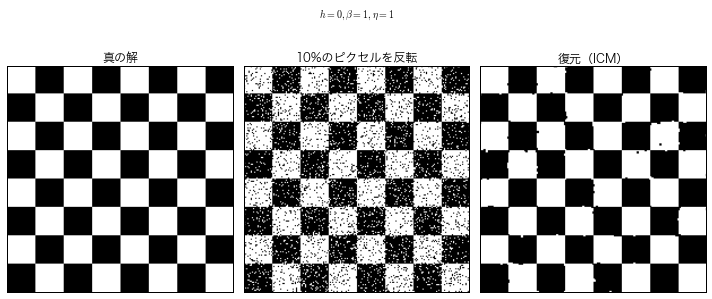

In [46]:
import matplotlib.pyplot as plt
from skimage.data import checkerboard
%matplotlib inline

x = np.where(checkerboard() >= 128, 1, -1)
y = np.where(np.random.rand(x.shape[0], x.shape[1]) >= 0.1, x, x * -1)

def energy(x, y, beta=1., eta=1., h=0.):
    """ エネルギー関数 """
    e = np.sum(x) * h 
    e -= beta * np.sum(x * np.roll(x, 1, axis=0) + x * np.roll(x, 1, axis=1))
    e -= eta * np.sum(x * y)
    return e

def ICM(y, niter=10):
    """ 反復条件付きモード（ICM; iterated conditional modes）"""
    recon = y.copy()
    for i in range(niter):
        e = energy(recon, y)
        e_old = e
        print(i, e)
        for row in range(recon.shape[0]):
            for col in range(recon.shape[1]):
                recon[row, col] *= -1
                e2 = energy(recon, y)
                if e < e2:
                    recon[row, col] *= -1
                else:
                    e = e2
        if e == e_old:
            break
    return recon
        
recon = ICM(y)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(x, cmap='gray')
ax[1].imshow(y, cmap='gray')
ax[2].imshow(recon, cmap='gray')
ax[0].set_title(u'真の解')
ax[1].set_title(u'10%のピクセルを反転')
ax[2].set_title(u'復元（ICM）')

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])

plt.suptitle(r'$h=0, \beta=1, \eta=1$')
plt.tight_layout()
plt.savefig('MRF-ICM.png', dpi=220)